In [1]:
import zipfile
import urllib.request
import os

year = 2010
data_path = '\\Users\\jesus\\Desktop\\143_ECE\\Final_Project\\recursive_predictions\\ozone_data\\'
for i in range(11):
    pass
    url = 'https://aqs.epa.gov/aqsweb/airdata/daily_42101_'+str(year)+'.zip'
    print(url)
    urllib.request.urlretrieve(url, data_path+'ozone_data'+str(year)+'.zip')
    with zipfile.ZipFile(data_path+'ozone_data'+str(year)+'.zip', 'r') as zip_ref:
        zip_ref.extractall(data_path+str(year)+'_data')
    
    os.remove(data_path+'ozone_data'+str(year)+'.zip') 

    year +=1

https://aqs.epa.gov/aqsweb/airdata/daily_42101_2010.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2011.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2012.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2013.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2014.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2015.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2016.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2017.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2018.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2019.zip
https://aqs.epa.gov/aqsweb/airdata/daily_42101_2020.zip


In [2]:
import csv
def convine_data_files():
    data_path = '\\Users\\jesus\\Desktop\\143_ECE\\Final_Project\\recursive_predictions\\ozone_data\\'
    year = 2010
    lines = []
    for i in range(11):
        with open(data_path+str(year)+'_data'+'\\daily_42101_'+str(year)+'.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for line in list(reader):
                lines.append(line)
        year += 1
    return lines

In [3]:
ozone_data = convine_data_files()

In [4]:
import matplotlib.pyplot as plt
from datetime import timezone
from datetime import datetime
import numpy as np
import itertools

class city_regression:
    def __init__(self, data, city_name):
        self.city_name = city_name
        self.data = []
        self.data_float = []
        added_dates = []
        for ind_measurment in data:
            if(city_name in ind_measurment):
                temp = [datetime.strptime(ind_measurment[11],"%Y-%m-%d"),float(ind_measurment[16])]
                if(str(datetime.strptime(ind_measurment[11],"%Y-%m-%d")) not in added_dates):
                    added_dates.append(str(datetime.strptime(ind_measurment[11],"%Y-%m-%d")))
                    self.data.append(temp)
                    self.data_float.append([datetime.strptime(ind_measurment[11],"%Y-%m-%d").timestamp(),float(ind_measurment[16])])
        print(len(self.data))

        #self.data_float[1] = np.convolve(self.data_float[1], np.ones(30), 'valid') / 7
        #self.data_float[1] = list(itertools.islice(self.data_float[1],0,len(self.data_float[1])-1,7))
        #x = list(itertools.islice(self.data_float[0],0,len(self.data_float[0])-1,7))        
    def __str__(self):
        return str(self.city_name)
    def print_graph(self):
        a = np.asarray(self.data)

        x, y = a.T
        y = np.convolve(y, np.ones(30), 'valid') / 7
        y = list(itertools.islice(y,0,len(y)-1,7))
        x = list(itertools.islice(x,0,len(x)-1,7))
        print(len(x[0:-4]), len(y))
        plt.plot(x[0:-4],y)
        plt.show()
        
        

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [14]:
county_sample =['Alameda','Butte','Contra Costa', 'Fresno','Humboldt', 'Imperial', 'Kern', 'Los Angeles', 'Marin', 'Monterey', 'Napa','Orange','Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Mateo', 'Santa Barbara', 'Solano', 'Sonoma', 'Stanislaus']
print(len(county_sample))

23


In [15]:
county_data = []
for i in county_sample:
    county_data.append(city_regression(ozone_data,i))
print(len(county_data))

3867
3762
3867
3866
3823
3699
2930
3835
3855
3812
3858
3835
3835
3866
3835
3866
3864
3812
3863
3895
3806
3840
3846
23


522
261


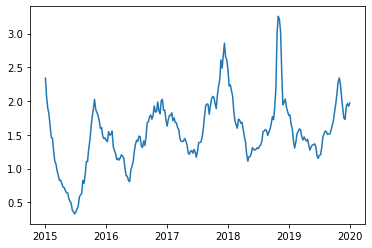

26 26
507
247


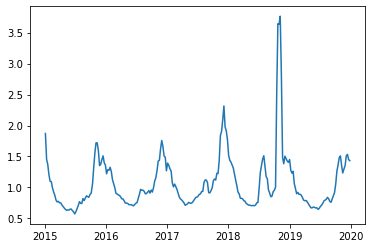

26 26
522
261


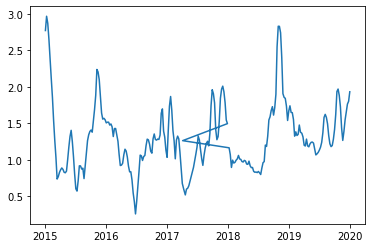

26 26
522
261


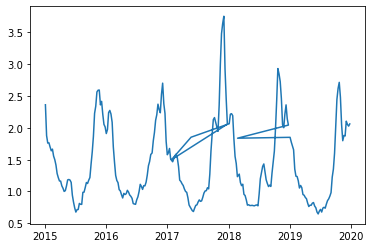

25 25
521
261


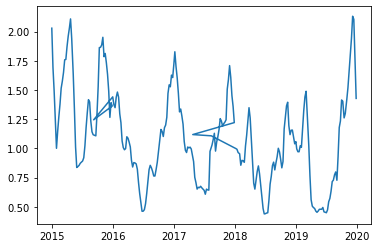

20 20
520
261


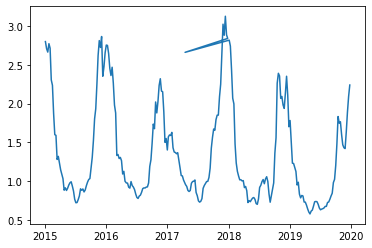

4 4
391
130


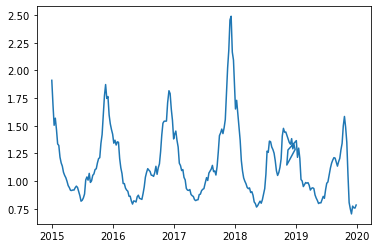

23 23
522
261


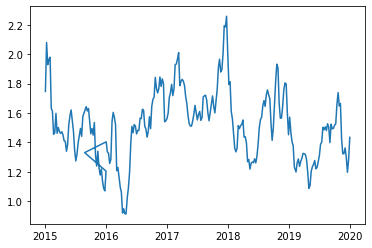

21 21
520
261


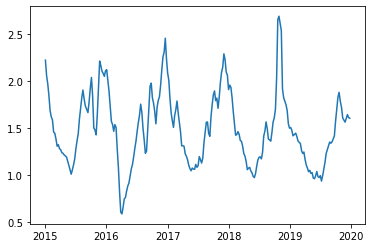

26 26
519
259


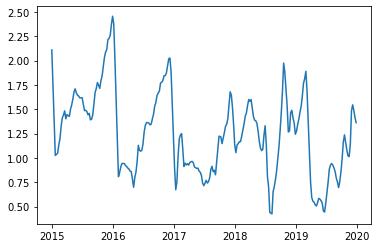

21 21
521
261


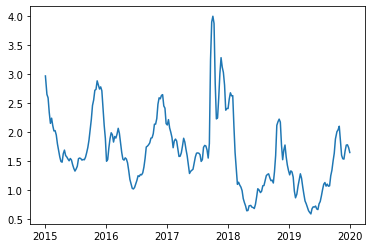

25 25
522
261


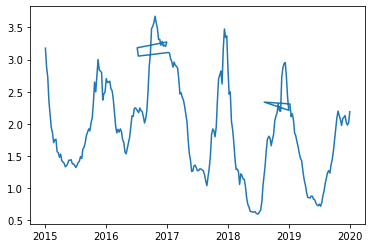

21 21
522
261


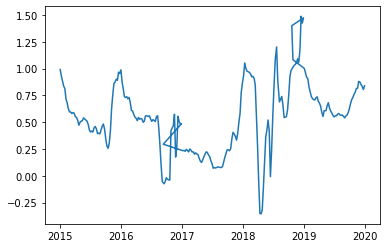

21 21
522
261


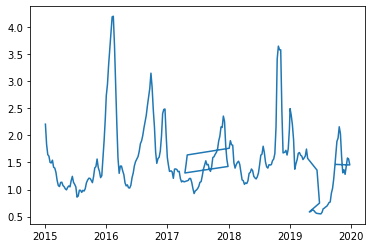

25 25
522
261


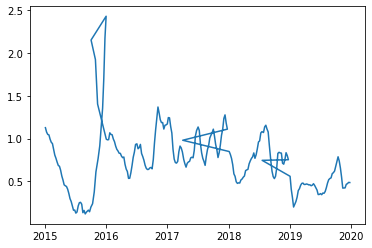

21 21
522
261


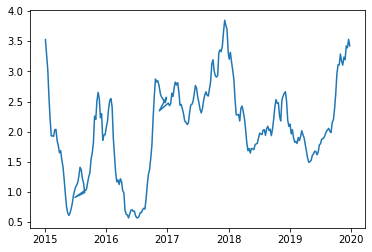

25 25
522
261


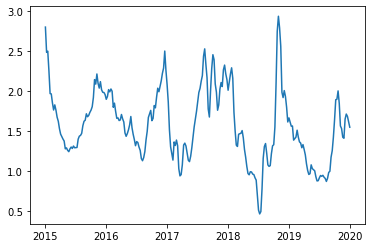

25 25
515
258


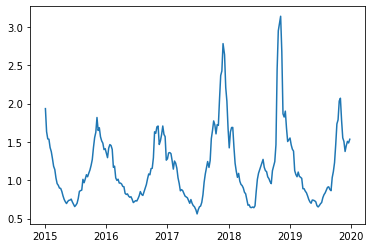

25 25
522
261


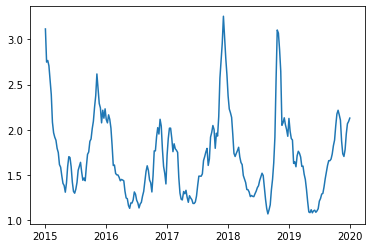

25 25
522
261


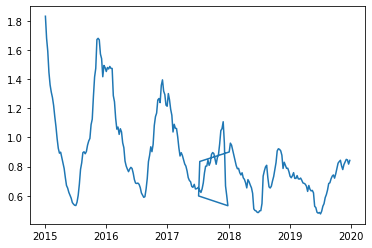

30 30
518
260


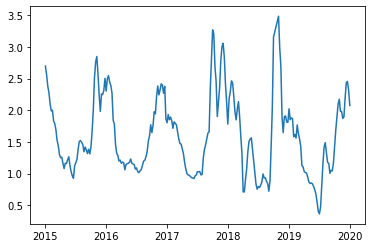

21 21
518
258


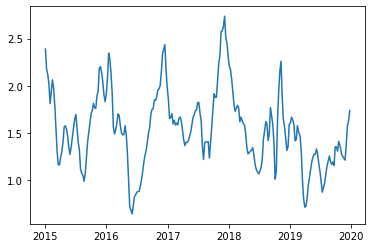

26 26
521
261


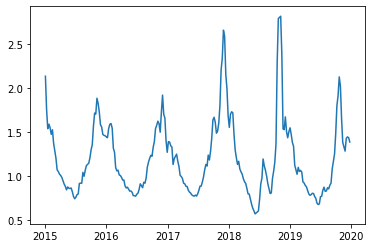

24 24


In [16]:
train_data_convined = []
test_data = []
test_dates = []
for i in county_data:
    a = np.asarray(i.data)
    #print(len(a))
    x, y = a.T
    #print(len(x), len(y))
    y = np.convolve(y, np.ones(30), 'valid') / 7
    y = list(itertools.islice(y,0,len(y)-1,7))
    x = list(itertools.islice(x,0,len(x)-1,7))
    minDate = 1
    maxDate = 1
    #print(len(x), len(y))
    while True:
        try:
            print(x.index(datetime(2020,1,minDate)))
            break
        except:
            minDate = minDate +1
    while True:
        try:
            print(x.index(datetime(2015,1,maxDate)))
            break
        except:
            maxDate = maxDate +1
            
    trainData = (x[x.index(datetime(2015,1,maxDate)):x.index(datetime(2020,1,minDate))],y[x.index(datetime(2015,1,maxDate)):x.index(datetime(2020,1,minDate))])
    
    #print(len(trainData[0]), len(trainData[1]))
    #print(trainData[0][-1],trainData[0][-2])

    plt.plot(trainData[0],trainData[1])
    plt.show()
    train_data_convined.append(trainData)
    test_data.append(y[x.index(datetime(2020,1,minDate))+1:])
    test_dates.append(x[-len(test_data[-1]):])
    print(len(test_data[-1]), len(test_dates[-1]))

In [17]:
predictions = []
print(len(train_data_convined))
k = 0
for i in train_data_convined:
    my_order = (0,1,0)
    my_seasonal_order = (1, 0, 1, 52.18)
    # define model
    model = SARIMAX(i[1], order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    predictions.append(model_fit.forecast(len(test_dates[k])))
    k = k +1

23


C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jesus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


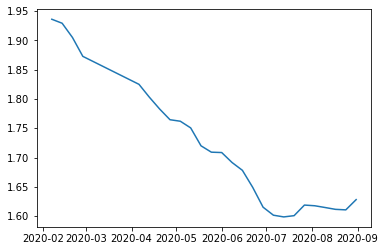

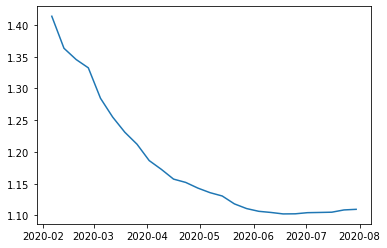

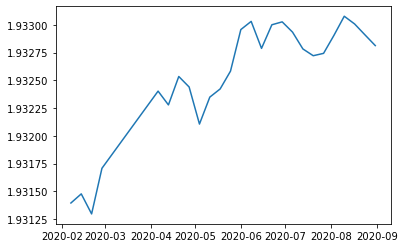

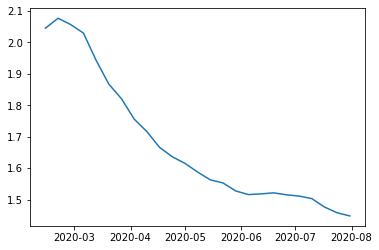

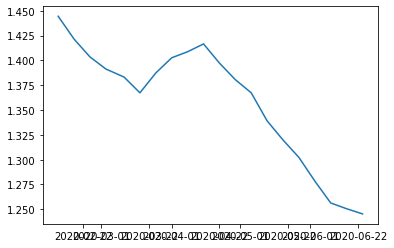

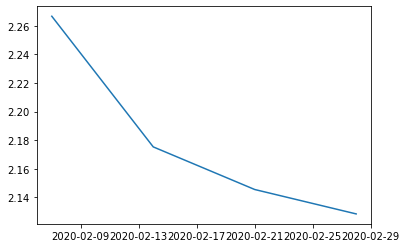

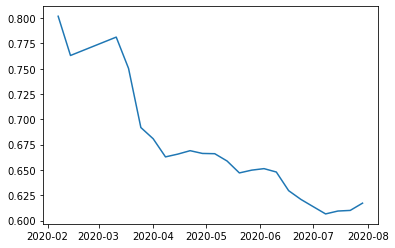

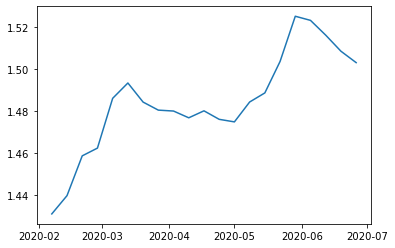

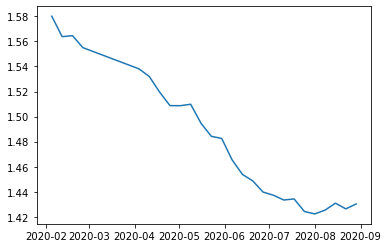

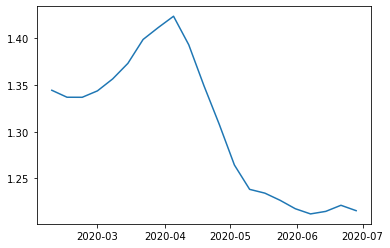

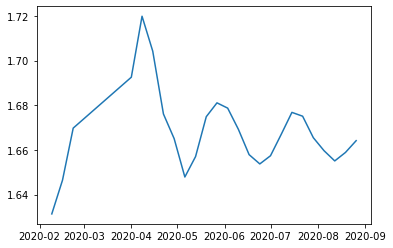

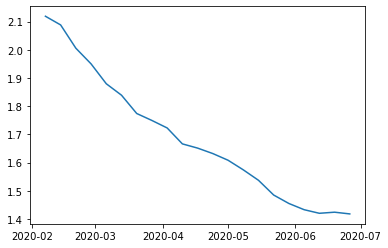

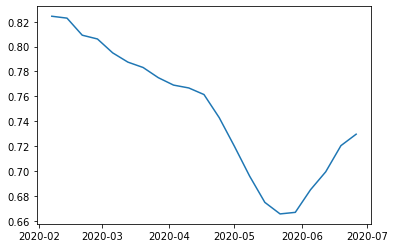

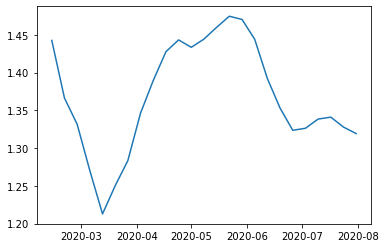

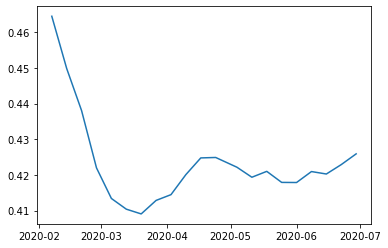

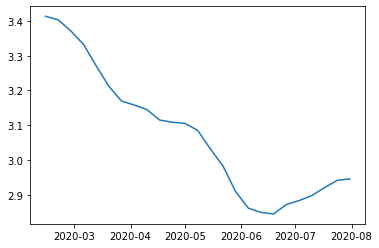

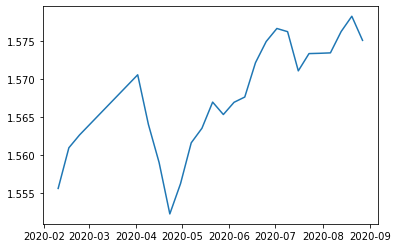

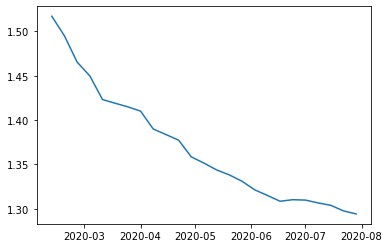

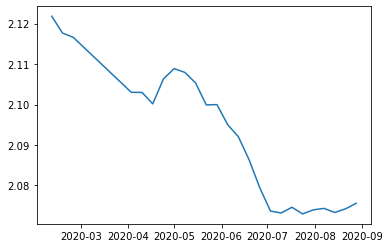

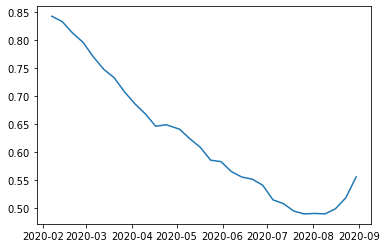

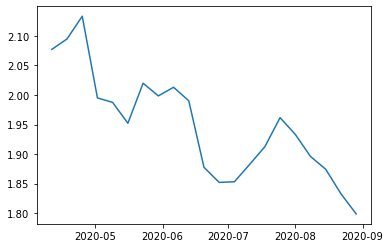

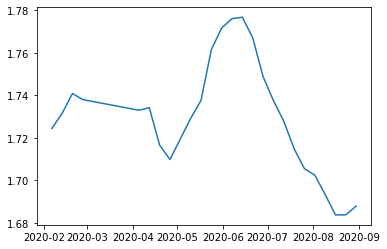

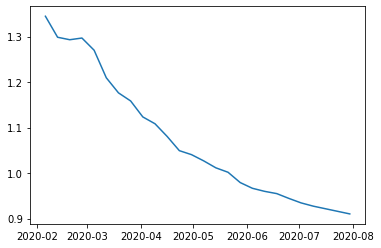

In [18]:
predictions_with_date = []
k = 0
for i in predictions:
    minDate = 1
    plt.plot(test_dates[k],i)
    plt.show()
    k = k + 1

23 23


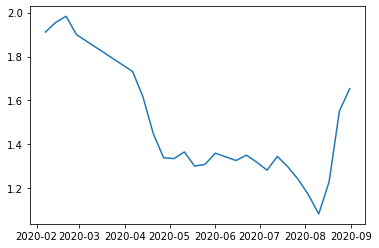

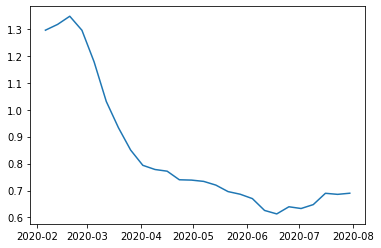

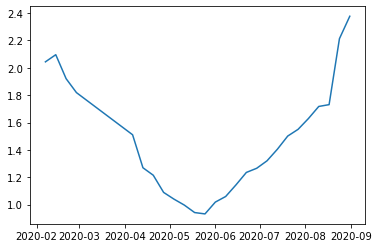

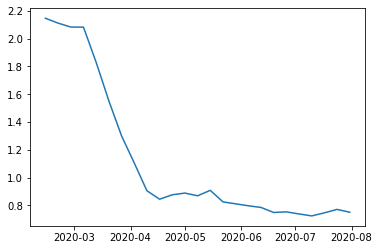

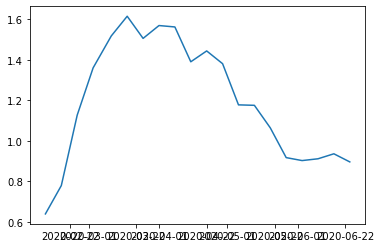

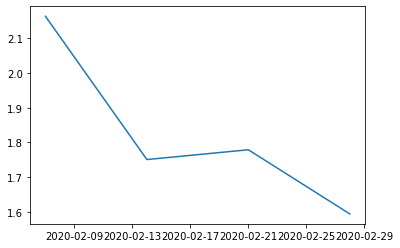

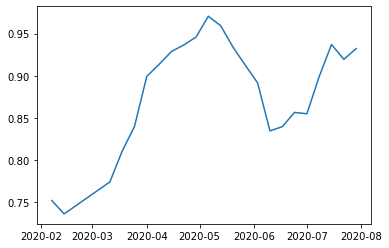

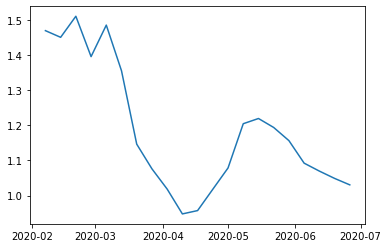

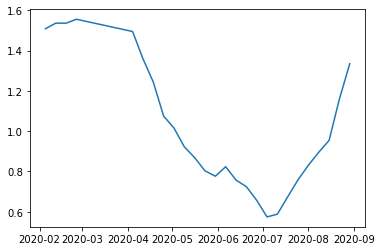

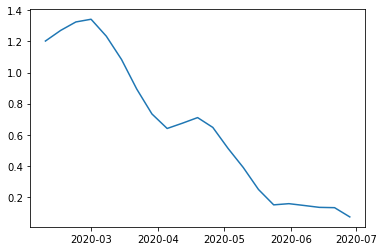

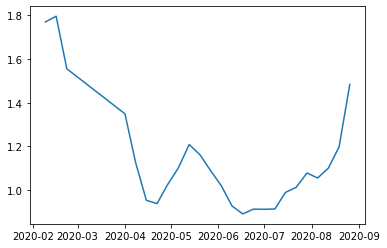

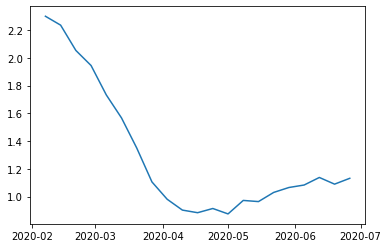

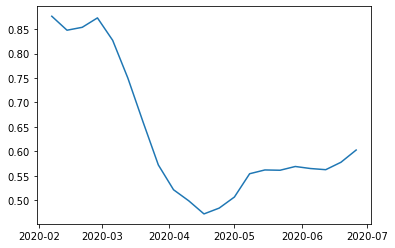

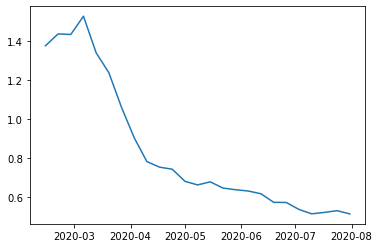

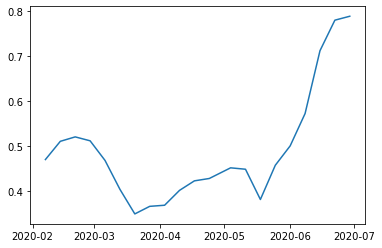

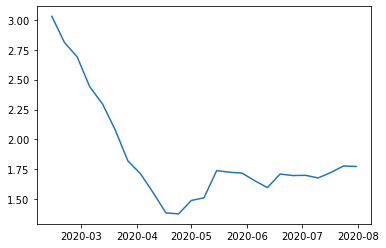

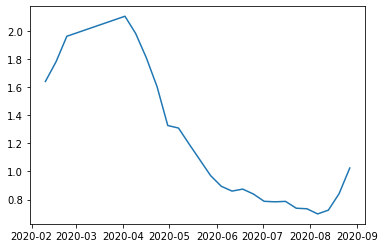

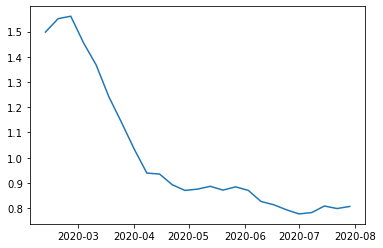

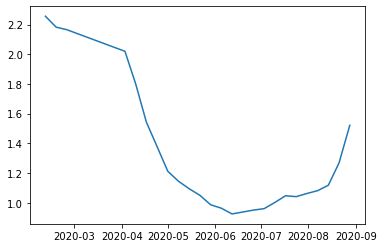

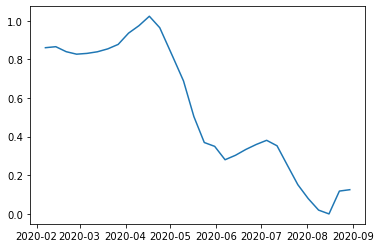

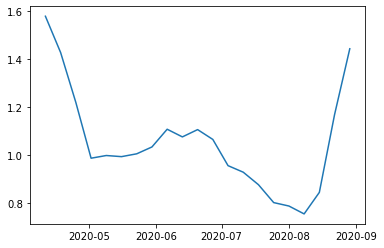

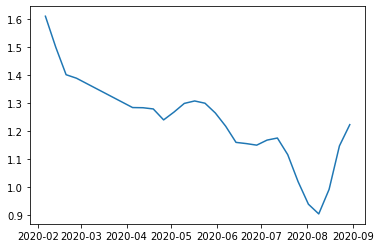

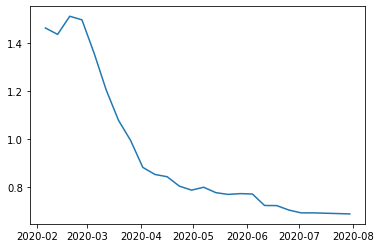

In [19]:
print(len(test_data), len(predictions))
k = 0
for i in test_data:
    plt.plot(test_dates[k],i)
    plt.show()
    k = k + 1

<ipython-input-20-5e1c2314a3d6>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))


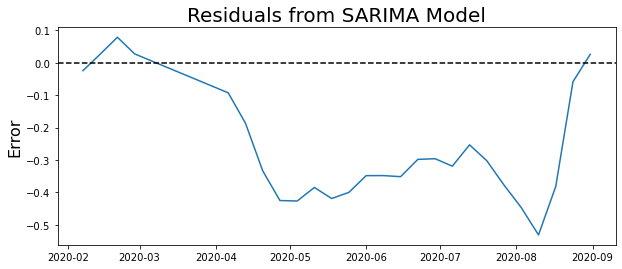

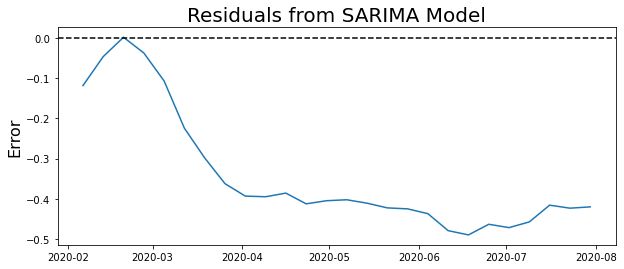

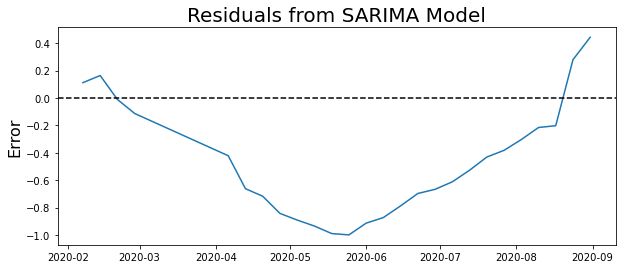

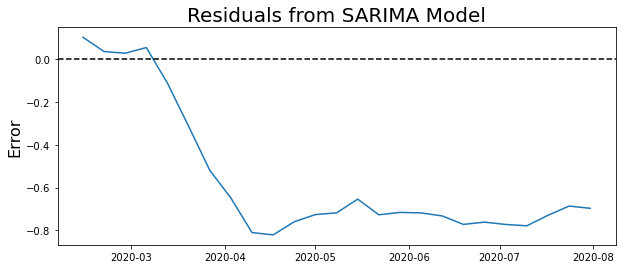

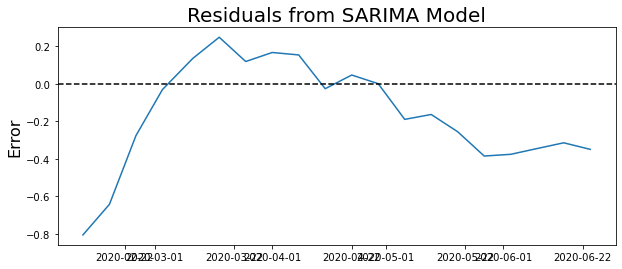

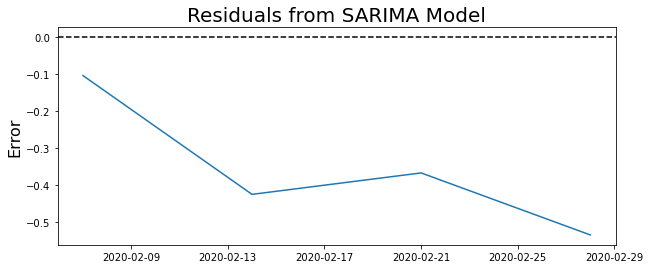

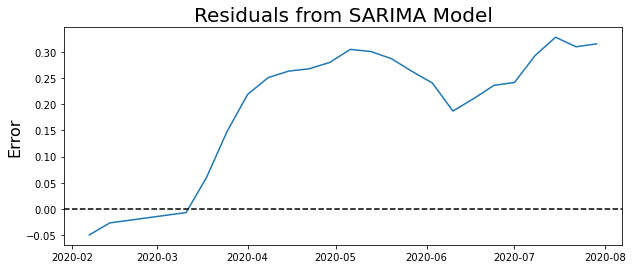

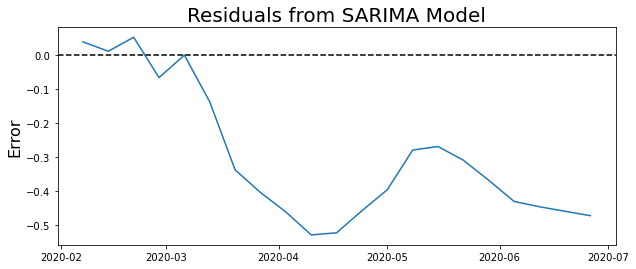

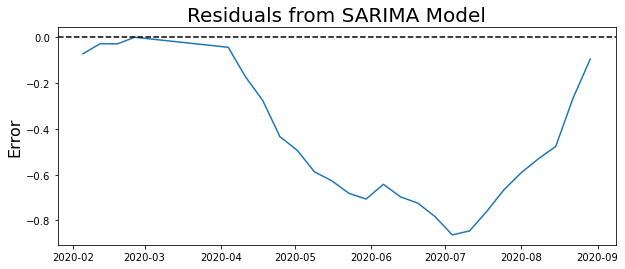

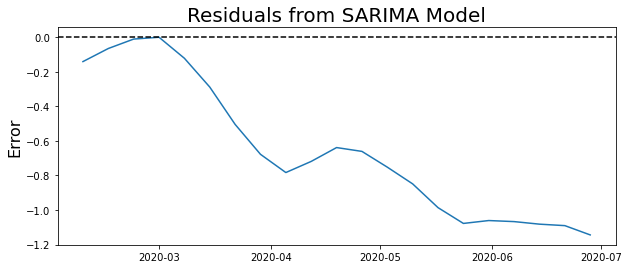

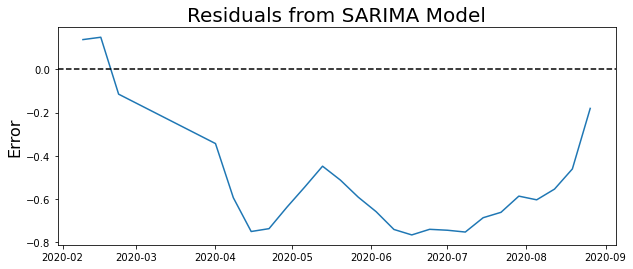

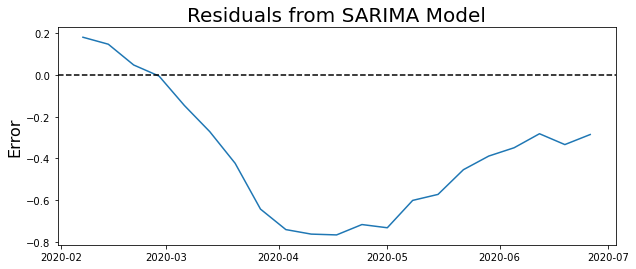

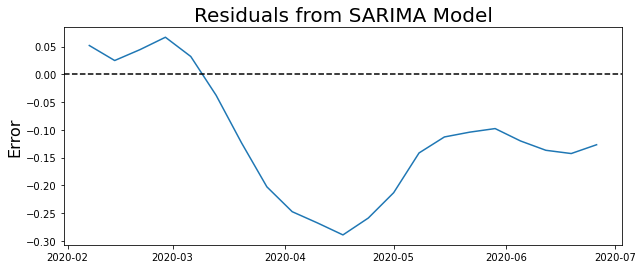

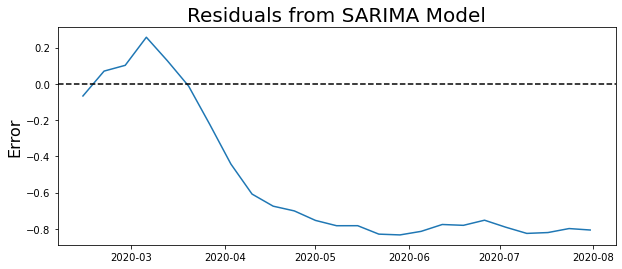

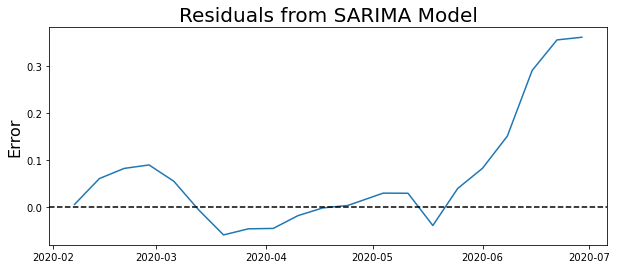

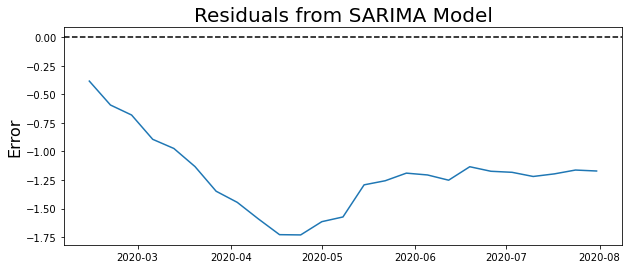

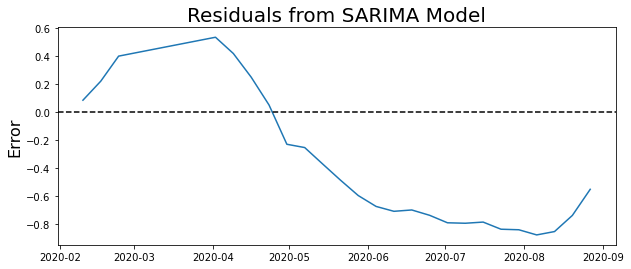

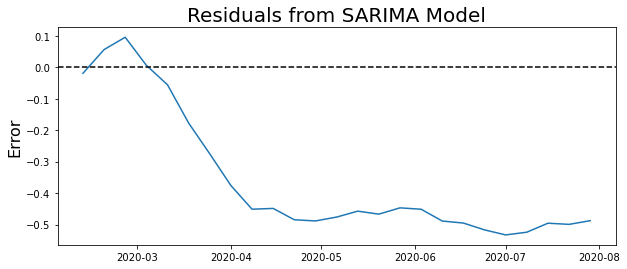

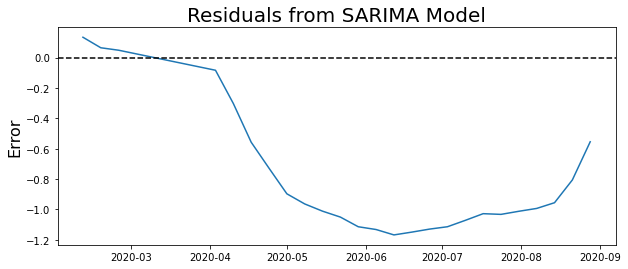

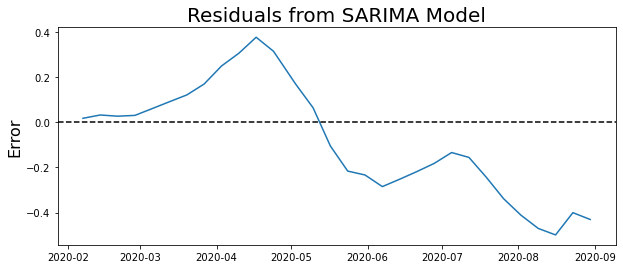

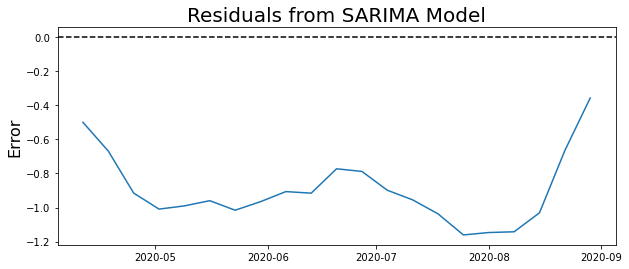

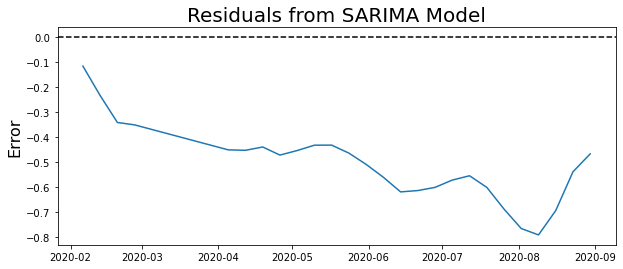

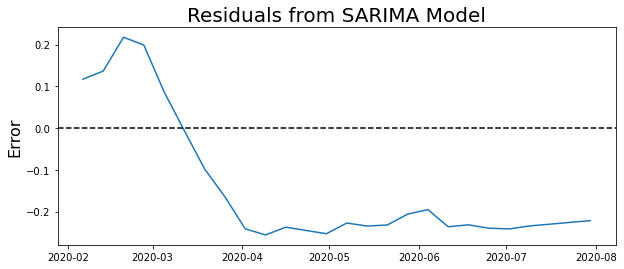

In [20]:
for i in range(len(test_data)):
    residuals = test_data[i] - predictions[i]
    plt.figure(figsize=(10,4))
    plt.plot(test_dates[i],residuals)
    plt.axhline(0, linestyle='--', color='k')
    plt.title('Residuals from SARIMA Model', fontsize=20)
    plt.ylabel('Error', fontsize=16)